In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

In [34]:
X, y = make_moons(n_samples=1500, noise=0.3, random_state=42)

In [35]:
X.shape, y.shape

((1500, 2), (1500,))

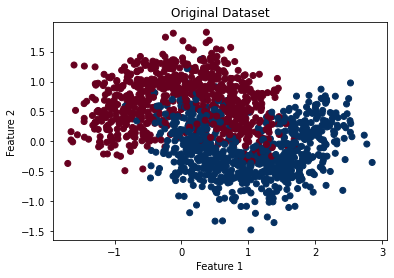

In [36]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Dataset')
plt.show()

In [37]:
X = StandardScaler().fit_transform(X)

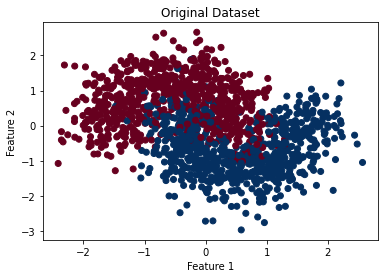

In [38]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Original Dataset')
plt.show()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Underfitting:

In [40]:
model = Sequential([
    Dense(1, activation='sigmoid', input_shape=(2,))
])

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10
38/38 [==============================] - 2s 14ms/step - loss: 1.1445 - accuracy: 0.1417 - val_loss: 1.0640 - val_accuracy: 0.1267
Epoch 2/10
38/38 [==============================] - 0s 7ms/step - loss: 0.9867 - accuracy: 0.1417 - val_loss: 0.9217 - val_accuracy: 0.1267
Epoch 3/10
38/38 [==============================] - 0s 7ms/step - loss: 0.8603 - accuracy: 0.1442 - val_loss: 0.8075 - val_accuracy: 0.1367
Epoch 4/10
38/38 [==============================] - 0s 5ms/step - loss: 0.7603 - accuracy: 0.1900 - val_loss: 0.7177 - val_accuracy: 0.2567
Epoch 5/10
38/38 [==============================] - 0s 5ms/step - loss: 0.6824 - accuracy: 0.5417 - val_loss: 0.6484 - val_accuracy: 0.7567
Epoch 6/10
38/38 [==============================] - 0s 6ms/step - loss: 0.6225 - accuracy: 0.7883 - val_loss: 0.5945 - val_accuracy: 0.8200
Epoch 7/10
38/38 [==============================] - 0s 6ms/step - loss: 0.5760 - accuracy: 0.8158 - val_loss: 0.5517 - val_accuracy: 0.8433
Epoch 8/10
38/38 [=

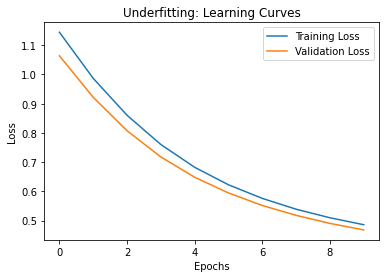

In [42]:
# Plot the learning curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Underfitting: Learning Curves')
plt.legend()
plt.show()

# 2. Overfitting

In [44]:
model = Sequential([
    Dense(200, activation='relu', input_shape=(2,)),
    Dense(200, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
38/38 [==============================] - 2s 14ms/step - loss: 0.3990 - accuracy: 0.8425 - val_loss: 0.2834 - val_accuracy: 0.8800
Epoch 2/100
38/38 [==============================] - 0s 7ms/step - loss: 0.3121 - accuracy: 0.8608 - val_loss: 0.2690 - val_accuracy: 0.8933
Epoch 3/100
38/38 [==============================] - 0s 7ms/step - loss: 0.2953 - accuracy: 0.8667 - val_loss: 0.2578 - val_accuracy: 0.8967
Epoch 4/100
38/38 [==============================] - 0s 7ms/step - loss: 0.2805 - accuracy: 0.8725 - val_loss: 0.2408 - val_accuracy: 0.9000
Epoch 5/100
38/38 [==============================] - 0s 6ms/step - loss: 0.2644 - accuracy: 0.8858 - val_loss: 0.2245 - val_accuracy: 0.9033
Epoch 6/100
38/38 [==============================] - 0s 7ms/step - loss: 0.2523 - accuracy: 0.8917 - val_loss: 0.2180 - val_accuracy: 0.9033
Epoch 7/100
38/38 [==============================] - 0s 9ms/step - loss: 0.2396 - accuracy: 0.9017 - val_loss: 0.2033 - val_accuracy: 0.9033
Epoch 8/100


Epoch 59/100
38/38 [==============================] - 0s 9ms/step - loss: 0.2045 - accuracy: 0.9092 - val_loss: 0.1789 - val_accuracy: 0.9367
Epoch 60/100
38/38 [==============================] - 0s 8ms/step - loss: 0.2042 - accuracy: 0.9100 - val_loss: 0.1744 - val_accuracy: 0.9400
Epoch 61/100
38/38 [==============================] - 0s 8ms/step - loss: 0.2002 - accuracy: 0.9125 - val_loss: 0.1796 - val_accuracy: 0.9367
Epoch 62/100
38/38 [==============================] - 0s 6ms/step - loss: 0.2016 - accuracy: 0.9092 - val_loss: 0.1824 - val_accuracy: 0.9333
Epoch 63/100
38/38 [==============================] - 0s 7ms/step - loss: 0.2019 - accuracy: 0.9092 - val_loss: 0.1744 - val_accuracy: 0.9367
Epoch 64/100
38/38 [==============================] - 0s 7ms/step - loss: 0.2034 - accuracy: 0.9117 - val_loss: 0.1756 - val_accuracy: 0.9300
Epoch 65/100
38/38 [==============================] - 0s 7ms/step - loss: 0.2002 - accuracy: 0.9058 - val_loss: 0.1711 - val_accuracy: 0.9400
Epoch 

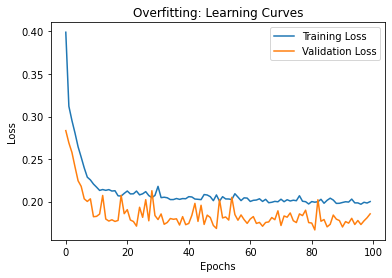

In [45]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Overfitting: Learning Curves')
plt.legend()
plt.show()

# 3. Regularization

In [51]:
model = Sequential([
    Dense(200, activation='relu', input_shape=(2,), kernel_regularizer=regularizers.l2(0.01)),
    Dense(200, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
38/38 [==============================] - 2s 25ms/step - loss: 1.8987 - accuracy: 0.8258 - val_loss: 1.2145 - val_accuracy: 0.8767
Epoch 2/100
38/38 [==============================] - 0s 9ms/step - loss: 0.9215 - accuracy: 0.8600 - val_loss: 0.6463 - val_accuracy: 0.8767
Epoch 3/100
38/38 [==============================] - 0s 10ms/step - loss: 0.5609 - accuracy: 0.8617 - val_loss: 0.4460 - val_accuracy: 0.8833
Epoch 4/100
38/38 [==============================] - 0s 9ms/step - loss: 0.4344 - accuracy: 0.8617 - val_loss: 0.3763 - val_accuracy: 0.8800
Epoch 5/100
38/38 [==============================] - 0s 10ms/step - loss: 0.3938 - accuracy: 0.8592 - val_loss: 0.3501 - val_accuracy: 0.8800
Epoch 6/100
38/38 [==============================] - 0s 10ms/step - loss: 0.3759 - accuracy: 0.8617 - val_loss: 0.3425 - val_accuracy: 0.8800
Epoch 7/100
38/38 [==============================] - 0s 11ms/step - loss: 0.3672 - accuracy: 0.8617 - val_loss: 0.3313 - val_accuracy: 0.8933
Epoch 8/

38/38 [==============================] - 0s 7ms/step - loss: 0.2846 - accuracy: 0.9058 - val_loss: 0.2578 - val_accuracy: 0.9333
Epoch 59/100
38/38 [==============================] - 0s 5ms/step - loss: 0.2943 - accuracy: 0.8983 - val_loss: 0.2523 - val_accuracy: 0.9133
Epoch 60/100
38/38 [==============================] - 0s 5ms/step - loss: 0.2807 - accuracy: 0.9058 - val_loss: 0.2521 - val_accuracy: 0.9367
Epoch 61/100
38/38 [==============================] - 0s 5ms/step - loss: 0.2803 - accuracy: 0.9108 - val_loss: 0.2490 - val_accuracy: 0.9333
Epoch 62/100
38/38 [==============================] - 0s 5ms/step - loss: 0.2846 - accuracy: 0.9050 - val_loss: 0.2782 - val_accuracy: 0.9033
Epoch 63/100
38/38 [==============================] - 0s 5ms/step - loss: 0.2900 - accuracy: 0.8992 - val_loss: 0.2488 - val_accuracy: 0.9267
Epoch 64/100
38/38 [==============================] - 0s 5ms/step - loss: 0.2833 - accuracy: 0.9108 - val_loss: 0.2579 - val_accuracy: 0.9267
Epoch 65/100
38/38 

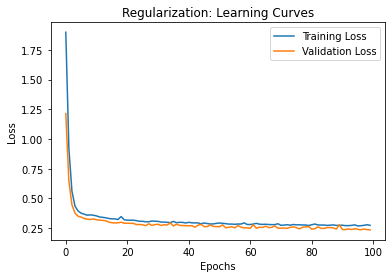

In [52]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Regularization: Learning Curves')
plt.legend()
plt.show()